# SCRAPING TWITTER DATA USING BEAUTIFUL SOUP AND SELENIUM TO OVERCOME LIMITATIONS OF TWEEPY API

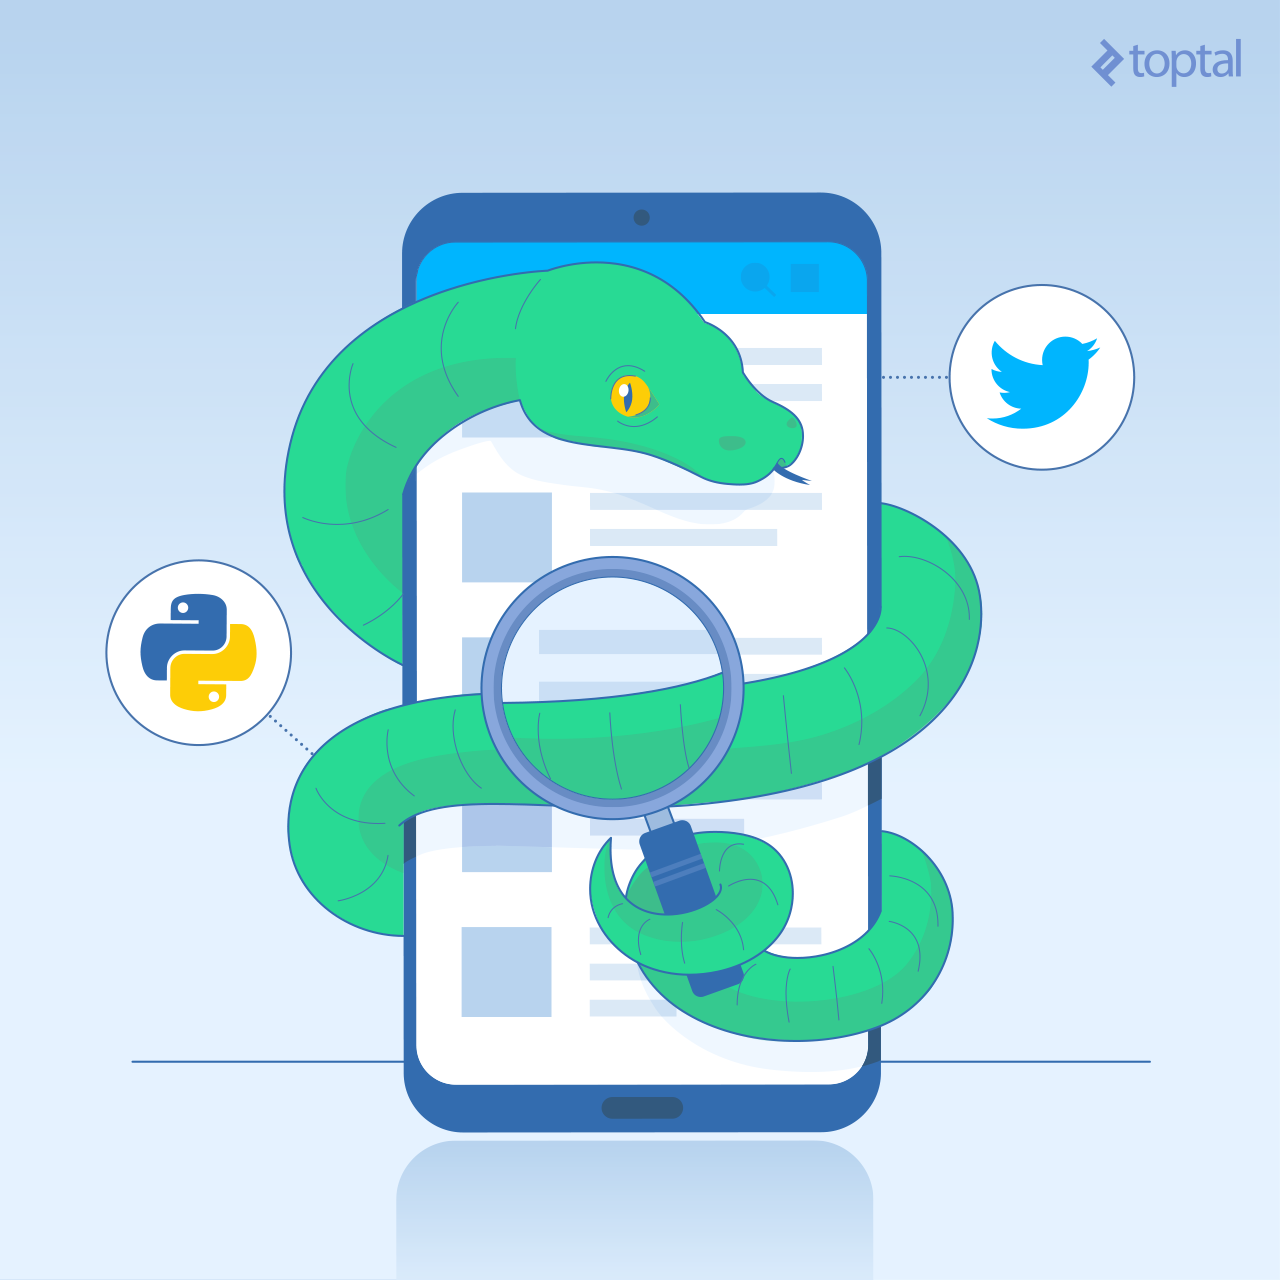

In [10]:
from IPython.display import Image
Image(filename='twitter_img.png')

In [1]:
# Import the dependencies
from bs4 import BeautifulSoup
import time
import re
from selenium import webdriver

In [4]:
# Accessing and opening the chrome browser using selenium module
browser = webdriver.Chrome(r'C:\webdrivers\chromedriver')

# Entering the search criteria 
base_url = u'https://twitter.com/search?q='
query = input('Enter query (use %23 for hashtags, use %20 for space, use %3 for account): ')
#query = u'%23aflac'
option = input('Do you want to filter by date Y/N: ')
if option == "Y":
    start = input('enter start date(YYYY-MM-DD): ')
    end = input('enter the end date(YYYY-MM-DD): ')
    filter_by_date = '%20since%3A'+start+'%20until%3A'+end
#%20since%3A2018-09-11%20until%3A2018-09-13
    url = base_url + query + filter_by_date
else:
    url = base_url + query


time.sleep(1)

Enter query (use %23 for hashtags, use %20 for space, use %3 for account): %3arealdonaldtrump
Do you want to filter by date Y/N: Y
enter start date(YYYY-MM-DD): 2018-09-14
enter the end date(YYYY-MM-DD): 2018-09-15


In [2]:
# Opening the URL in chrome browser and scolling the screen down till the last page
def tweet_scroller(url):

    browser.get(url)
    
    #define initial page height for 'while' loop
    lastHeight = browser.execute_script("return document.body.scrollHeight")
    
    while True:
        browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        #define how many seconds to wait while dynamic page content loads
        time.sleep(3)
        newHeight = browser.execute_script("return document.body.scrollHeight")
        
        if newHeight == lastHeight:
            break
        else:
            lastHeight = newHeight
            
    html = browser.page_source

    return html

In [5]:
# Getting the soup object from the html  
soup = BeautifulSoup(tweet_scroller(url), "html.parser")

# Filtering the soup 
all_tweets = soup.find_all('div',{'class':'tweet'})


In [3]:
# Initializing the lists to store different pieces of information
user_list = []
time_list = []
msg_list = []
tweet_id_list = []
hash_list = []
one_list = []
headers_list = ["User","Tweet_id","Timestamp","Message","Hashtags"]
final_list =[]
final_list.append(headers_list)

In [6]:
# Iterating and Storing the data in their respective lists
for tweet in all_tweets:
    #context = tweet.find('div',{'class':'context'}).text.replace("\n"," ").strip()
    content = tweet.find('div',{'class':'content'})
    header = content.find('div',{'class':'stream-item-header'})
    user = re.findall("@\w+",header.find('a',{'class':'account-group js-account-group js-action-profile js-user-profile-link js-nav'}).text.replace("\n"," ").strip())[0]
    time = header.find('a',{'class':'tweet-timestamp js-permalink js-nav js-tooltip'}).prettify()#.find('span').text.replace("\n"," ").strip()
    index1 = time.find('data-conversation-id')
    index2 = time.find('href')
    tweet_id= time[index1+22:index2-2]
    index3 = time.find('title')
    index4 = time.find('span')
    timestamp = time[index3+7:index4-5]
    message = content.find('div',{'class':'js-tweet-text-container'}).text.replace("\n"," ").strip()
    hashtags = " ".join(re.findall("#[a-zA-Z]+", message))
    one_list.append(user)
    one_list.append(tweet_id)
    one_list.append(timestamp)
    one_list.append(message)
    one_list.append(hashtags)
    final_list.append(one_list)
    one_list = []

In [7]:
print(final_list[:5])

[['User', 'Tweet_id', 'Timestamp', 'Message', 'Hashtags'], ['@realDonaldTrump', '1040717757107589126', '2:43 PM - 14 Sep 2018', 'Keep up the great work - THANK YOU!https://twitter.com/femaregion4/status/1040702223901241344\xa0…', ''], ['@realDonaldTrump', '1040730663832498176', '3:35 PM - 14 Sep 2018', '“They say all these people died in the storm in Puerto Rico, yet 70% of the power was out before the storm. So when did people start dying? At what point do you recognize that what they are doing is a political agenda couched in the nice language of journalism?”  @GeraldoRivera', ''], ['@realDonaldTrump', '1040716938626965505', '2:40 PM - 14 Sep 2018', 'We love the #CajunNavy - THANK YOU! #FlorenceHurricane2018pic.twitter.com/RuP55jWX8e', '#CajunNavy #FlorenceHurricane'], ['@LouDobbs', '1040750101487144965', '4:52 PM - 14 Sep 2018', 'Tonight’s #QuoteOfTheDay is from our great President @realdonaldtrump. #MAGA #TrumpTrain #Dobbspic.twitter.com/Hd2cmtWlSP', '#QuoteOfTheDay #MAGA #TrumpTra